In [141]:
import numpy as np
import sympy as sp
import control  
import control.matlab
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg

In [142]:
# A)
#  Matrizes do Sistema
#  A partir do slide 9 da apresentação EE02
A = np.matrix('0 1;-3 -2');
B = np.matrix('0 ; 1');
C = np.matrix('1 0');
D = np.matrix('0');

In [143]:
s1 = -2
s2 = -3
s3 = -15

In [144]:
# Matrizes Expandidas
A_chapeu = np.block([[A, np.zeros([2,1])],[-C, 0]]);
B_chapeu = np.block([[B],[0]]);

In [145]:
# Matriz de Controlabilidade
Mc = np.block([[A, B],[-C, 0]]);

# teste de controlabilidade    = n+1?
np.linalg.matrix_rank(Mc)

3

In [146]:
# Matriz de ganhos do controlador K_chapeu = [k1 k2 -ki]
K_chapeu = control.acker(A_chapeu,B_chapeu,[s1, s2, s3])
K_chapeu

matrix([[ 78.,  18., -90.]])

In [147]:
 # Verificando
autovalores, autovetores = linalg.eig(A_chapeu-B_chapeu*K_chapeu);
autovalores

array([-15.+0.j,  -3.+0.j,  -2.+0.j])

In [148]:
K = K_chapeu[[0,0],[0,1]]
print(K)
k_i = -K_chapeu[0,2]
print(k_i)

[[78. 18.]]
90.0


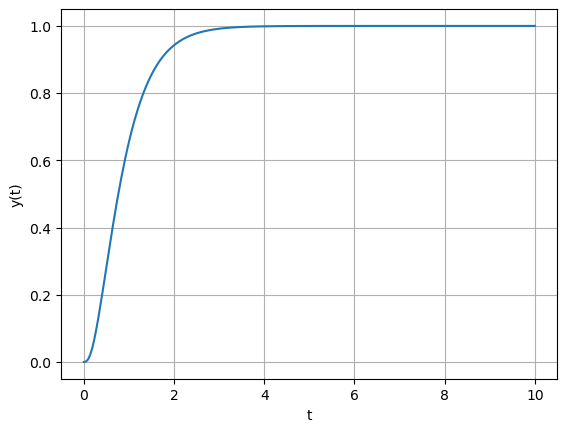

In [149]:
AA = np.block([[A-B*K, B*k_i],[-C, 0]]) 
BB = np.matrix([[0],[0],[1]])
CC = np.matrix([[1,0,0]])
DD = np.matrix([0])
planta_controlada = control.ss(AA, BB, CC, DD)
xf,yf = control.step_response(planta_controlada,10)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.plot(xf,yf)

In [150]:
#B)

X0 = [[0], [0], [0]];
X0 = np.matrix(X0)

In [151]:
# Solução com a transformada de laplace
#s, t = sp.symbols('s t')
s = sp.symbols('s')
t = sp.symbols('t', positive=True)

U = 1/(s);
# Matrizes
A = sp.Matrix(AA);
print(A)
B = sp.Matrix(BB);
print(B)
C = sp.Matrix(CC);
print(C)
D = sp.Matrix(DD);
print(D)
X0 = sp.Matrix(X0);

I = np.eye(3);

X = ((s*I-A)**-1)*X0+((s*I-A)**-1)*B*U;
Y = C*X;
Y = sp.expand(Y)
Y = sp.simplify(Y)
#Y = Y[0]
Y = Y.apart(s)
Y

Matrix([[0, 1.00000000000000, 0], [-81.0000000000000, -20.0000000000000, 90.0000000000000], [-1.00000000000000, 0, 0]])
Matrix([[0], [0], [1]])
Matrix([[1, 0, 0]])
Matrix([[0]])


Matrix([[-1.73076923076923/(0.5*s + 1.0) + 0.833333333333333/(0.333333333333333*s + 1.0) - 0.00256410256410256/(0.0666666666666667*s + 1.0) + 1.0/s]])

In [152]:
F1 = -1.73076923076923/(0.5*s+1);
F2 = 0.833333333333333/(0.333333333333333*s+1);
F3 = -0.00256410256410256/(0.0666666666666667*s+1);
F4 = 1/(s)
y = sp.inverse_laplace_transform(F1+F3, s, t)+sp.inverse_laplace_transform(F2+F4, s, t)
y

1.0 - 0.0384615384615385*exp(-15.0*t) + 2.5*exp(-3.0*t) - 3.46153846153846*exp(-2.0*t)

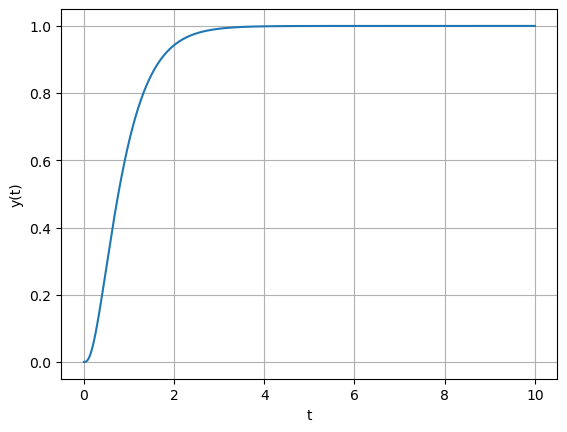

In [155]:
# comparando os resultados
# resposta da sulução encontrada
t = np.linspace(0, 10, 999);
y = 1.0 - 0.0384615384615385*np.exp(-15*t)+2.5*np.exp(-3*t)-3.46153846153846*np.exp(-2*t)
plt.figure()
plt.plot(t, y)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

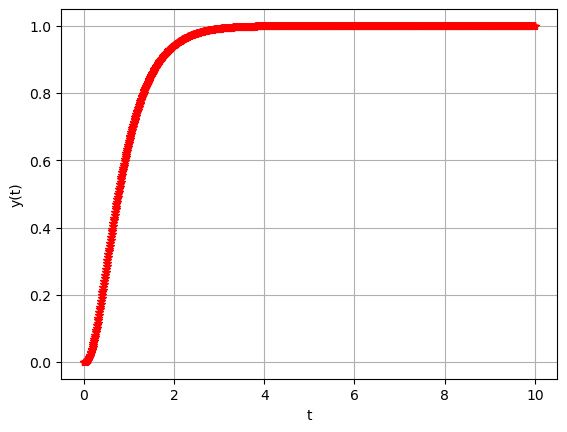

In [159]:
# resposta com o comando lsim
u = np.ones(len(t));
# sistema no espaço de estados
X0 = [[0], [0], [0]];
X0 = np.matrix(X0)
#sistema = control.ss(A,B,C,D);
y2, t, x = control.matlab.lsim(planta_controlada, u, t, X0);
plt.figure()
plt.plot(t, y2,t, y, 'r*')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()